In [4]:
from sympy import *
init_printing()



In [53]:
p ,cstar, B , EV1, x = symbols('p, c, B , EV1, x')


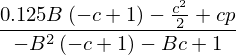

In [57]:
EV1 = (cstar*p - cstar ** 2 / 2+(1-cstar)* B *.125)/(1-cstar*B - (1-cstar)*B**2)
EV1

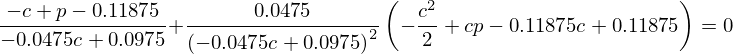

In [59]:
EV1 = EV1.subs(B, .95)
FOC = Eq(diff(EV1, cstar), 0)
FOC


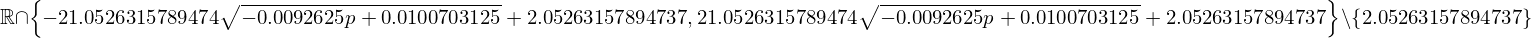

In [72]:
equilibrium = solveset(FOC, cstar,  domain=S.Reals)
equilibrium


In [73]:
plot(equilibrium, (p, 0, 1))

TypeError: 'NoneType' object is not iterable

In [31]:
import matplotlib.pyplot as plt
from numpy import log10 as nplog10


sb, sk, sc, skss, sgamma, srho, salpha = \
    symbols('b k c kss gamma rho alpha')

In [20]:
# b:     A dummy variable for equation solving
# k:     The stock of capital
# c:     Consumption
# kss:   The stock of capital in the steady state
# gamma: The coefficient of the utility function
# rho:   The continuous-time discount rate
# alpha: Production elasticity of capital

# n indicates the order of the Taylor polynomial. Be aware that Python starts
# counting at zero, so the polynomial has n+1 terms
n = 5



In [22]:
sa = MatrixSymbol('a',n+1,1)

# a:     Vector of coefficients of the Taylor polynomial
sa

In [23]:
# Value variables of a, rho, alpha, gamma, and kss:
va = zeros(n+1,1)
vrho = 0.05
valpha = 0.25
vgamma = -10
vkss = 1



In [24]:

# Production function
sf = (vrho/valpha)*sk**valpha

In [25]:

# The utility function is not used as such in the code, but it is in the
# Bellman equation implicitly. See the Bellman Equation below, and the
# notes document.

# Construct Taylor polynomial for consumption function
# The consumption function expresses optimal consumption as a function of
# capital stock
sctay = sum([sa[i,0]*(sk-skss)**i/factorial(i) for i in range(n+1)])


In [27]:

# Construct Bellman Equation
# See Judd and Guu and notes document for derivation
sBellman = -vrho*sctay - \
    vgamma*sctay*sctay.diff(sk)+\
    vgamma*sf*sctay.diff(sk)+\
    sctay*sf.diff(sk)

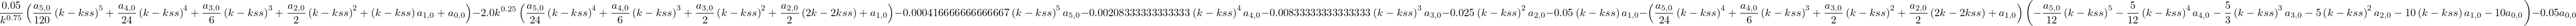

In [28]:
sBellman